In [1]:
## Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Reading the data
df = pd.read_csv('Iris.csv')

In [3]:
## Checking the columns present in the data
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
## Checking the data types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
## Checking the head of the data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
## Dropping unnecessary columns

cols = ['Id']
df = df.drop(cols, axis=1)

In [8]:
## Finding the numerical and categorical columns
cat_cols = [feature for feature in df.columns if df[feature].dtypes == 'O']
num_cols = [feature for feature in df.columns if feature not in cat_cols]

## Printing the numerical and categorical columns
print(f"Numerical columns: {num_cols}\n")
print(f"Categorical columns: {cat_cols}")

Numerical columns: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

Categorical columns: ['Species']


In [10]:
## Finding the unique values in the categorical feature columns
for feature in cat_cols:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {df[feature].nunique()}")
    print(f"Unique values: {df[feature].unique()}")
    print('\n')

Species:
Number of unique values in the Species: 3
Unique values: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']




In [11]:
## Checking for missing values in the dataset
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
## Checking for null values
df.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

**It seems there are no missing values in the dataset**


# **ENCODING**

In [28]:
## Since we already have 3 independent feature, we will use ordinal encoding instead of the one-hot encoding on the categorical features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label = le.fit_transform(df['Species'])
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# **OUTLIER DETECTION AND REMOVAL**

<Axes: >

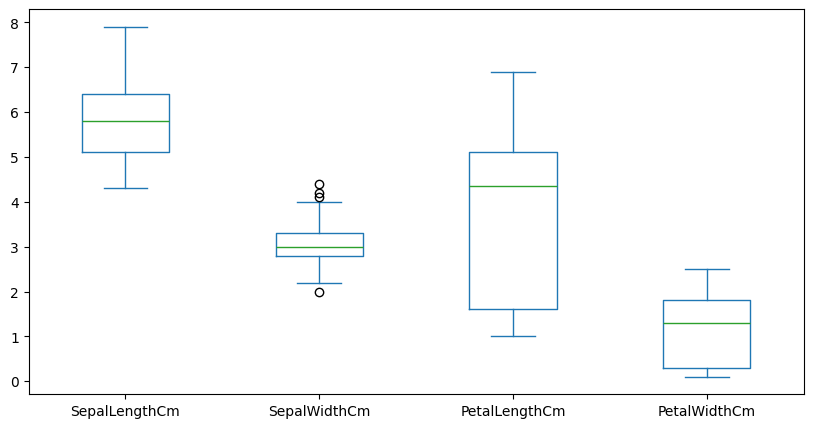

In [17]:
## Checking for outliers in the numerical features
df[num_cols].plot(kind='box', figsize=(10,5))

In [29]:
## Removing outliers from "Sepal Width" feature

# Calculate the interquartile range (IQR)
Q1 = df['SepalWidthCm'].quantile(0.25)
Q3 = df['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[(df['SepalWidthCm'] >= lower_bound) & (df['SepalWidthCm'] <= upper_bound)]


<Axes: >

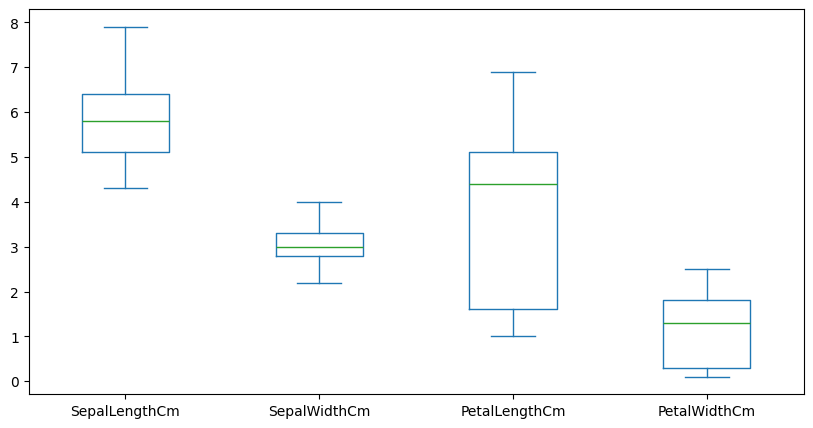

In [30]:
## Re-checking for outliers in the numerical features
df_filtered[num_cols].plot(kind='box', figsize=(10,5))

In [22]:
df = df_filtered

# **PLOTS**

<Axes: ylabel='Density'>

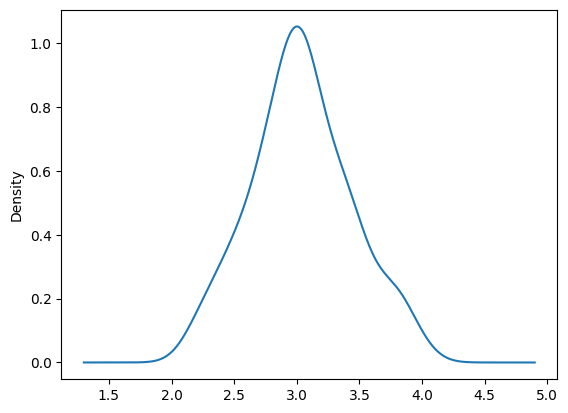

In [32]:
## Plotting important numerical feature
df['SepalWidthCm'].plot(kind='kde')

<Axes: ylabel='Density'>

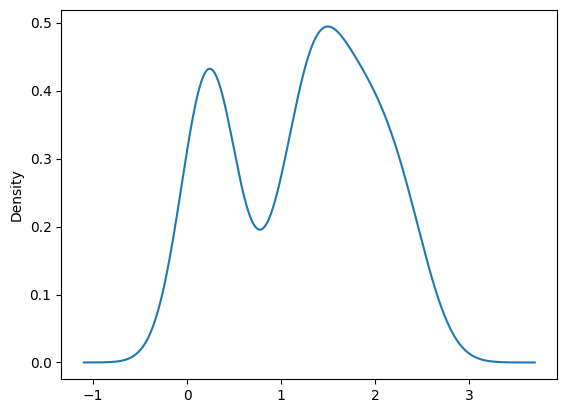

In [171]:
## Plotting important numerical feature
df['PetalWidthCm'].plot(kind='kde')

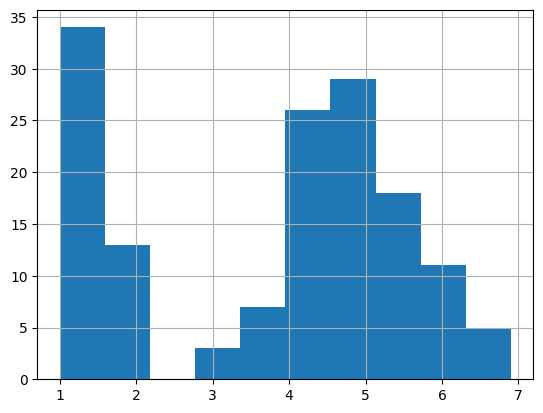

In [197]:
## Plotting important numerical feature
df.PetalLengthCm.hist()
plt.show()

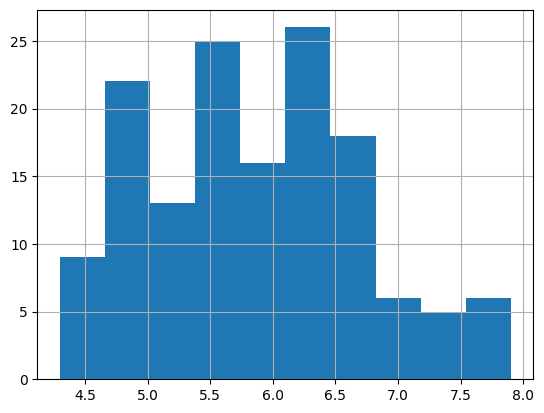

In [198]:
## Plotting important numerical feature
df.SepalLengthCm.hist()
plt.show()

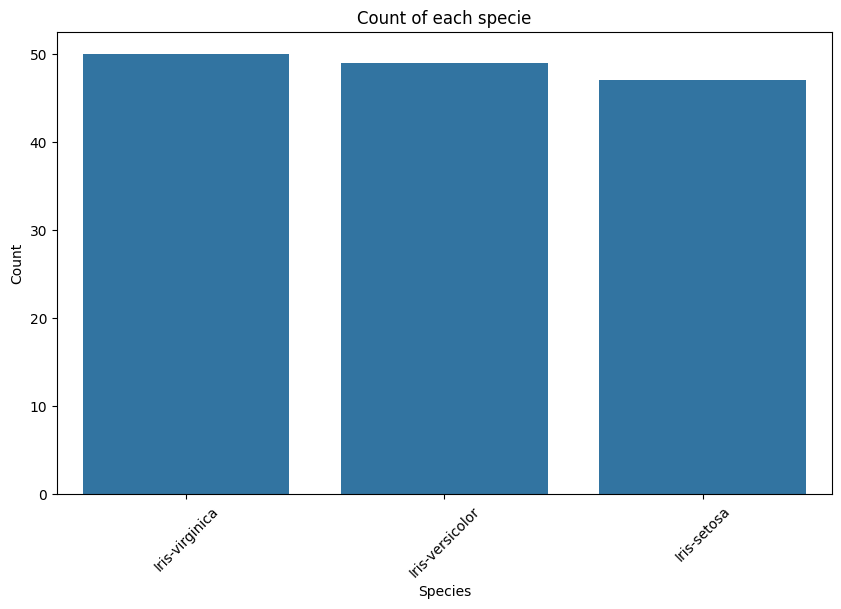

In [33]:
## Plotting ithe categorical feature

count = df['Species'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=count.index, y=count.values)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Count of each specie')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# **CLUSTERING** (Only for visualization)

c:\Users\fatim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


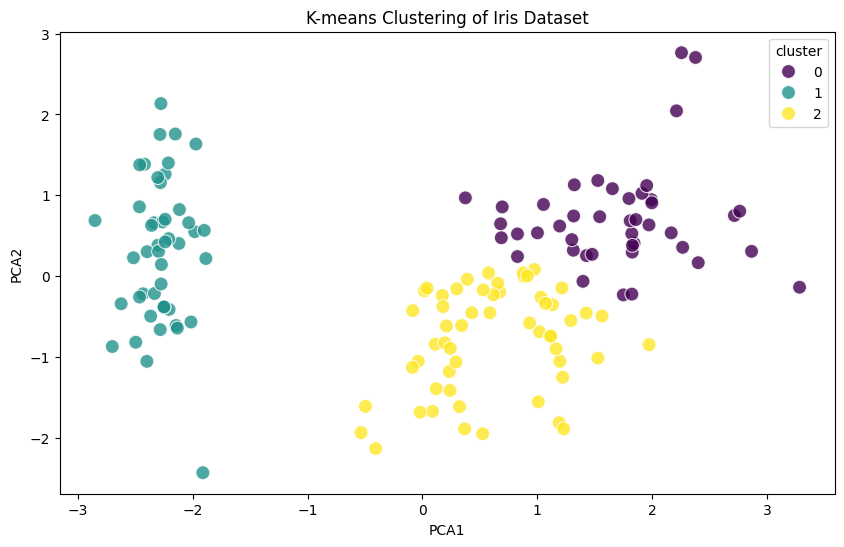

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Extract features (X)
X = df.drop('Species', axis=1)  # Features

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (k)
k = 3  # Assuming we want to cluster into 3 groups (setosa, versicolor, virginica)

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df['cluster'] = clusters

# Visualize the clusters using PCA (for 2D visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_df, palette='viridis', s=100, alpha=0.8)
plt.title('K-means Clustering of Iris Dataset')
plt.show()

# **MODEL TRAINING**

In [35]:
## Extract features (X) and labels (y)
X = df.drop('Species', axis=1)  # Features
y = df['Species']  # Labels

In [36]:
## Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 116 in training set, 30 in test set

In [37]:
## Feature scaling (standardize features)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
## Train the K-Nearest Neighbors (K-NN) classifier
from sklearn.neighbors import KNeighborsClassifier

k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
## Make predictions on the test set
y_pred = knn.predict(X_test)

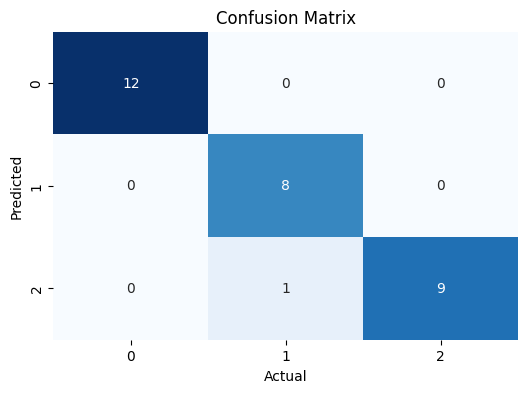

In [41]:
# Generate the confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
target_names = [0,1,2]

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [42]:
## Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9666666666666667
Precision: 0.9629629629629629
Recall: 0.9666666666666667
F1 Score: 0.9628482972136223
